In [140]:
import json
import re
import os
import glob
import re
import konlpy
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from collections import Counter
import numpy as np
import pyLDAvis.gensim
import pandas as pd

In [2]:
okt = konlpy.tag.Okt()
kkma =  konlpy.tag.Kkma()

### 데이터 불러오기 및 **백성** 이 포함된 날짜 남기기

In [175]:
def data_clean(filepath,keyword):
    dir =filepath
    file_list = glob.glob(dir+'*.txt')
    text_list=[]
    for fname in file_list:
        with open(fname, 'r', encoding='utf-8') as f:
            text = f.read()
        text_list = text_list + text.split("=====")
        text_list =[text for text in text_list if keyword in text]
        clean_text = []
        for line in range(len(text_list)):
            clean_text.append(re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','',text_list[line]))
    return clean_text

In [176]:
data_list = data_clean('25대철종/','백성')

In [177]:
data_list

['철종실록 권 철종 년 월 일 기유 번째기사 년 청 함풍 년천둥 번개로 인해 대료삼사와 재야의 신하에게 궐실을 묻다하교하기를계절이 거두어서 간직할 때인데 간밤에 천둥 번개가 쳤으니 이것이 어찌 이유가 없이 그러하겠는가 첫째도 내가 부덕한 탓이요 둘째도 내가 부덕한 탓이다 하찮은 내가 부덕한 몸으로 만백성의 윗자리를 차지하고 있으니 주야로 걱정하고 두려워하면서 감히 스스로 편안할 수가 없었다 그런데 어찌하여 정치가 뜻을 따르지 못하여 모든 일이 번잡스러워진 탓으로 풍속이 날로 저하되어도 만회할 수가 없고 기강이 날로 문란해지는데도 진작하여 쇄신시킬 수 없으며 탐묵이 날로 행해지고 있는데도 징계 면려할 수 없고 사치가 날로 심하여지는데도 금억할 수가 없다 그리하여 부역이 편중되고 민생이 거꾸로 매달려 있는 것 같은 고통에 이른 것이 근일 같은 때가 없었다 상천은 지극히 인자해서 깨우쳐 알리고 이끌어 인도하기를 어찌 이와 같이 정녕하게 하리 않겠는가 두렵고 송구스러운 마음이 가득 차서 벽에 기대어 잠을 이루지 못하고 있다 따라서 자신을 책하는 구례를 형식이라고만 하여 폐할 수는 없다 오늘부터 일 동안 감선하여 경외하는 정성을 만분의 일이나마 펴고 싶다 공구 수성하는 방책은 군신 상하 다 함께 면계해야 될 것이다 나의 대료삼사와 재야의 신하들은 모두 나의 궐실에 대해 숨김 없이 말하라하였다                                 ',
 '철종실록 권 철종 년 월 일 경진 번째기사 년 청 함풍 년효정전에 나아가 작헌례를 행하다효정전에 나아가 작헌례를 행하였다 친히 제문을 지었는데 그 내용에 이르기를소자가 이제 아들을 두었으니 천지 조종이 부탁할 데가 있고 방본인 민심이 의지할 데가 있게 되었습니다 이는 곧 우리 성모께서 평일 기망하시던 것이었고 적경의 소치인 것입니다 소자가 외방에서 오랫동안 노고에 시달리다가 들어와 큰 통서를 잇게 된 것도 성모의 명에 의한 것이고 하늘이 정해 준 배위를 곤전에 자리하게 하신 것도 성모의 명에 의한 것이었습니다 그리

### 불용어 제거 후, **명사,형용사** 만 남기기

In [246]:
stopword = ['인하여','이러한','없던','있는','어찌',
            '년','월','일','실록','오히려','번째기사','하라',
           '입니다','있으셔야','입니다하니','마땅히','없습니다',
           '같았습니다','마땅히','오니','뿐이겠습니까','있으니',
            '바야흐로','이르렀기','있으면서','같습니다','실록','반드시',
           '있어','우리','있었던','같습니다','더하여','아름다','있었는데',
           '있겠는가','철종','철종실록','정조','정조실록',
           '순조','순조실록','헌종','헌종실록','경종','경종실록','고종','고종실록','순종','순종실록']

In [247]:
def postag(data_list):
    word_temp =[]
    for i in range(len(data_list)):
        word = okt.pos(''.join(data_list[i]))
        word_temp2=[]
        for j in word:
            if len(j[0])>1 and j[0] not in stopword:
                if j[1] in ['Noun', 'Adjective']: #명사, 형용사
                    word_temp2.append(j[0])
        word_temp.append(word_temp2)
    return word_temp

In [202]:
# def postag(data_list):
#     for i,document in enumerate(data_list):
#         word_temp =[]
#         for word in okt.pos(document):
#             if word[1] in ['Noun', 'Adjective']: #명사, 형용사
#                 if len(word[0])>1 and j[0] not in stopword:
#                     word_temp.append(word[0])
#     return np.array(word_temp)

In [239]:
word_list =  postag(data_list)

In [227]:
word_list

[['철종실록',
  '철종',
  '기유',
  '기사',
  '함풍',
  '천둥',
  '번개',
  '인해',
  '대료',
  '삼사',
  '재야',
  '신하',
  '궐실',
  '하교',
  '계절',
  '직할',
  '간밤',
  '천둥',
  '번개',
  '이유',
  '그러하겠는가',
  '첫째',
  '부덕한',
  '둘째',
  '부덕한',
  '하찮은',
  '부덕한',
  '만백성',
  '자리',
  '차지',
  '주야',
  '걱정',
  '두려워하면서',
  '감히',
  '스스로',
  '편안할',
  '수가',
  '없었다',
  '어찌하여',
  '정치가',
  '모든',
  '번잡',
  '스러워진',
  '풍속',
  '날로',
  '저하',
  '만회',
  '수가',
  '없고',
  '기강',
  '날로',
  '문란해지는데도',
  '진작',
  '쇄신',
  '없으며',
  '날로',
  '있는데도',
  '징계',
  '면려',
  '없고',
  '사치',
  '날로',
  '심하여지는데도',
  '수가',
  '없다',
  '부역',
  '편중',
  '민생',
  '거꾸로',
  '같은',
  '고통',
  '같은',
  '없었다',
  '인자해서',
  '알리',
  '인도',
  '정녕',
  '하리',
  '두렵고',
  '송구',
  '마음',
  '가득',
  '차서',
  '있다',
  '따라서',
  '자신',
  '구례',
  '형식',
  '없다',
  '오늘',
  '동안',
  '감선',
  '정성',
  '만분',
  '일이',
  '공구',
  '수성',
  '방책',
  '군신',
  '상하',
  '계해',
  '대료',
  '삼사',
  '재야',
  '신하',
  '모두',
  '궐실',
  '대해'],
 ['철종실록',
  '철종',
  '경진',
  '기사',
  '함풍',
  '년효',
  '정전',
  '정전',
  '친히',
  '제문',
  '내용',
  '

### 단어들을 가지고 LDA모델링

In [240]:
def topic(word):
    dictionary = corpora.Dictionary(word)
    corpus = [dictionary.doc2bow(text) for text in word]
    NUM_TOPICS = 15
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    topic_list = []
    for topic in topics:
        topic_list.append(topic)
    return topic_list

In [241]:
topic(word_list)

[(0, '0.009*"수가" + 0.009*"마음" + 0.008*"사람" + 0.008*"백성"'),
 (1, '0.012*"기사" + 0.011*"함풍" + 0.011*"고을" + 0.008*"위유"'),
 (2, '0.011*"윤선거" + 0.010*"백성" + 0.010*"윤증" + 0.009*"선정"'),
 (3, '0.010*"절목" + 0.008*"수가" + 0.007*"지금" + 0.007*"백성"'),
 (4, '0.011*"소자" + 0.009*"마음" + 0.009*"백성" + 0.009*"자성"'),
 (5, '0.143*"태백성" + 0.080*"기사" + 0.066*"함풍" + 0.011*"백성"'),
 (6, '0.014*"백성" + 0.011*"하니" + 0.010*"사람" + 0.009*"임금"'),
 (7, '0.014*"백성" + 0.011*"하니" + 0.011*"기사" + 0.009*"고을"'),
 (8, '0.017*"백성" + 0.009*"기사" + 0.008*"마음" + 0.007*"하니"'),
 (9, '0.011*"마음" + 0.009*"백성" + 0.006*"정조" + 0.005*"또한"'),
 (10, '0.008*"하니" + 0.008*"임금" + 0.007*"백성" + 0.007*"나라"'),
 (11, '0.014*"백성" + 0.008*"기사" + 0.007*"생각" + 0.007*"동안"'),
 (12, '0.028*"백성" + 0.010*"임금" + 0.010*"마음" + 0.010*"기사"'),
 (13, '0.014*"백성" + 0.010*"기사" + 0.009*"시행" + 0.009*"사람"'),
 (14, '0.014*"백성" + 0.010*"기사" + 0.008*"대해" + 0.008*"하교"')]

### 토픽모델링 시각화

In [230]:
def view_lda(word):
    pyLDAvis.enable_notebook()
    dictionary = corpora.Dictionary(word)
    corpus = [dictionary.doc2bow(text) for text in word]
    NUM_TOPICS = 15
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
    return pyLDAvis.display(vis)

In [242]:
view_lda(word_list)

### 각 주제가 가장 많은 비중을 차지하는 리뷰

### 백성키워드의 연관규칙

In [135]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [305]:
def apriori_result(word_list):
    te = TransactionEncoder()
    te_result = te.fit(word_list).transform(word_list)
    df = pd.DataFrame(te_result,columns=te.columns_)
    itemset = apriori(df, use_colnames=True)
    itemset['length']= itemset['itemsets'].apply(lambda x: len(x))
    itemset=itemset[itemset['length'] >= 2]
    return itemset

In [310]:
apriori_result(word_list)

,support,itemsets,length
3,0.528302,"(백성, 기사)",2
4,0.713208,"(함풍, 기사)",2


In [306]:
itemset = apriori_result(word_list)

### 네트워크 그래프
> 참고사이트 : http://blog.daum.net/geoscience/1408

In [283]:
import networkx as nx
import matplotlib.pyplot as plt

# 한글깨짐방지코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [308]:
def network_g(itemset):
    G = nx.Graph()
    ar = (itemset['itemsets']);G.add_edges_from(ar)
    pr = nx.pagerank(G)
    nsize = np.array([v for v in pr.values()])
    nsize = 2000 *(nsize-min(nsize))/(max(nsize)-min(nsize))
    pos = nx.planar_layout(G)
    plt.figure(figsize=(10,10)); plt.axis('off')
    return nx.draw_networkx(G,font_size=16,
                pos=pos, node_color=list(pr.values()),node_size=nsize,font_family=font_name,
                alpha=0.7,edge_color='.5',cmap=plt.cm.RdBu_r)

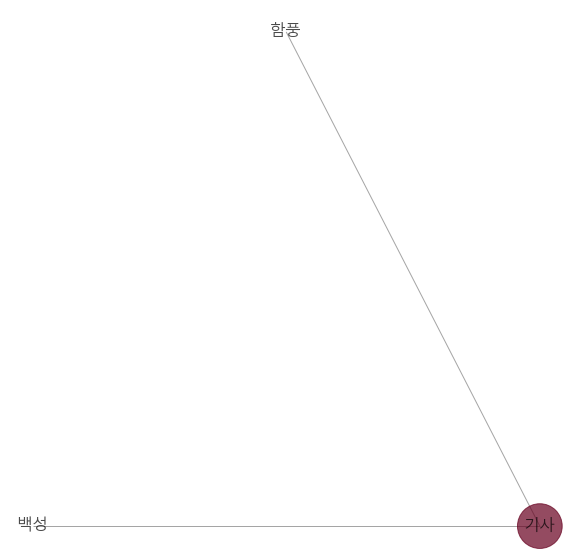

In [309]:
network_g(itemset)

In [ ]:
# api만들어서 웹 혹은 앱과 연동
#키워드, 왕이름, 단어list로 구조가 이루어질것

In [251]:
# encode
json_str = json.dumps(word_list)
# decode
json.loads(json_str)

[['기유',
  '기사',
  '함풍',
  '천둥',
  '번개',
  '인해',
  '대료',
  '삼사',
  '재야',
  '신하',
  '궐실',
  '하교',
  '계절',
  '직할',
  '간밤',
  '천둥',
  '번개',
  '이유',
  '그러하겠는가',
  '첫째',
  '부덕한',
  '둘째',
  '부덕한',
  '하찮은',
  '부덕한',
  '만백성',
  '자리',
  '차지',
  '주야',
  '걱정',
  '두려워하면서',
  '감히',
  '스스로',
  '편안할',
  '수가',
  '없었다',
  '어찌하여',
  '정치가',
  '모든',
  '번잡',
  '스러워진',
  '풍속',
  '날로',
  '저하',
  '만회',
  '수가',
  '없고',
  '기강',
  '날로',
  '문란해지는데도',
  '진작',
  '쇄신',
  '없으며',
  '날로',
  '있는데도',
  '징계',
  '면려',
  '없고',
  '사치',
  '날로',
  '심하여지는데도',
  '수가',
  '없다',
  '부역',
  '편중',
  '민생',
  '거꾸로',
  '같은',
  '고통',
  '같은',
  '없었다',
  '인자해서',
  '알리',
  '인도',
  '정녕',
  '하리',
  '두렵고',
  '송구',
  '마음',
  '가득',
  '차서',
  '있다',
  '따라서',
  '자신',
  '구례',
  '형식',
  '없다',
  '오늘',
  '동안',
  '감선',
  '정성',
  '만분',
  '일이',
  '공구',
  '수성',
  '방책',
  '군신',
  '상하',
  '계해',
  '대료',
  '삼사',
  '재야',
  '신하',
  '모두',
  '궐실',
  '대해'],
 ['경진',
  '기사',
  '함풍',
  '년효',
  '정전',
  '정전',
  '친히',
  '제문',
  '내용',
  '소자',
  '이제',
  '아들',
  '천지',
  '조종',